In [1]:
import scipy.io
import numpy as np
from utils import get_rdms, get_rdm, inter_intra_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob
import imageio
import torch
%load_ext autoreload
%autoreload 2

In [2]:
%store -r vilt_multi
%store -r vilt_random_multi

%store -r albef_img
%store -r albef_random_img
%store -r albef_txt
%store -r albef_random_txt
%store -r albef_multi
%store -r albef_random_multi

%store -r clip_img
%store -r clip_random_img
%store -r clip_txt
%store -r clip_random_txt

%store -r gpt_feats
%store -r vit
%store -r bert_feats

bert_feats = bert_feats.repeat_interleave(10, dim=1)
gpt_feats = gpt_feats.repeat_interleave(10, dim=1)
clip_txt = clip_txt.repeat_interleave(10, dim=1)
clip_random_txt = clip_random_txt.repeat_interleave(10, dim=1)

In [3]:
def plot_intra_inter(inter, intra, intra_random, inter_random, model, ax):
    layers = [f"Layer {i+1}" for i in range(len(inter))]
    ax.plot(layers, intra, marker="o", color="red", label="Intra-Cluster Similarity")
    ax.plot(layers, inter, marker="o", color="blue", label="Inter-Cluster Similarity")
    ax.plot(layers, intra_random, marker="o", color="orange", linestyle='dashed', label="Intra-Cluster Similarity (random)")
    ax.plot(layers, inter_random, marker="o", color="lightblue", linestyle='dashed', label="Inter-Cluster Similarity (random)")
    ax.set_xlabel("Layers")
    ax.set_ylabel("Similarity")
    ax.set_title(f"{model}")
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.grid(True)
    ax.legend()

In [4]:
intra_clip_img, inter_clip_img = inter_intra_similarity(clip_img, "CLIP Image")
intra_clip_txt, inter_clip_txt = inter_intra_similarity(clip_txt, "CLIP Text")
intra_vilt, inter_vilt = inter_intra_similarity(vilt_multi, "Vilt")
intra_abelf_img, inter_albef_img = inter_intra_similarity(albef_img, "Albef Image")
intra_abelf_txt, inter_abelf_txt = inter_intra_similarity(albef_txt, "Albef Text")
intra_abelf_multi, inter_albef_multi = inter_intra_similarity(albef_multi, "Albef Multi")

intra_clip_img_r, inter_clip_img_r = inter_intra_similarity(clip_random_img, "CLIP Random Image")
intra_clip_txt_r, inter_clip_txt_r = inter_intra_similarity(clip_random_txt, "CLIP Random Text")
intra_vilt_r, inter_vilt_r = inter_intra_similarity(vilt_random_multi, "Random Vilt")
intra_abelf_img_r, inter_albef_img_r = inter_intra_similarity(albef_random_img, "Albef Random Image")
intra_abelf_txt_r, inter_abelf_txt_r = inter_intra_similarity(albef_random_txt, "Albef Random Text")
intra_abelf_multi_r, inter_albef_multi_r = inter_intra_similarity(albef_random_multi, "Albef Random Multi")

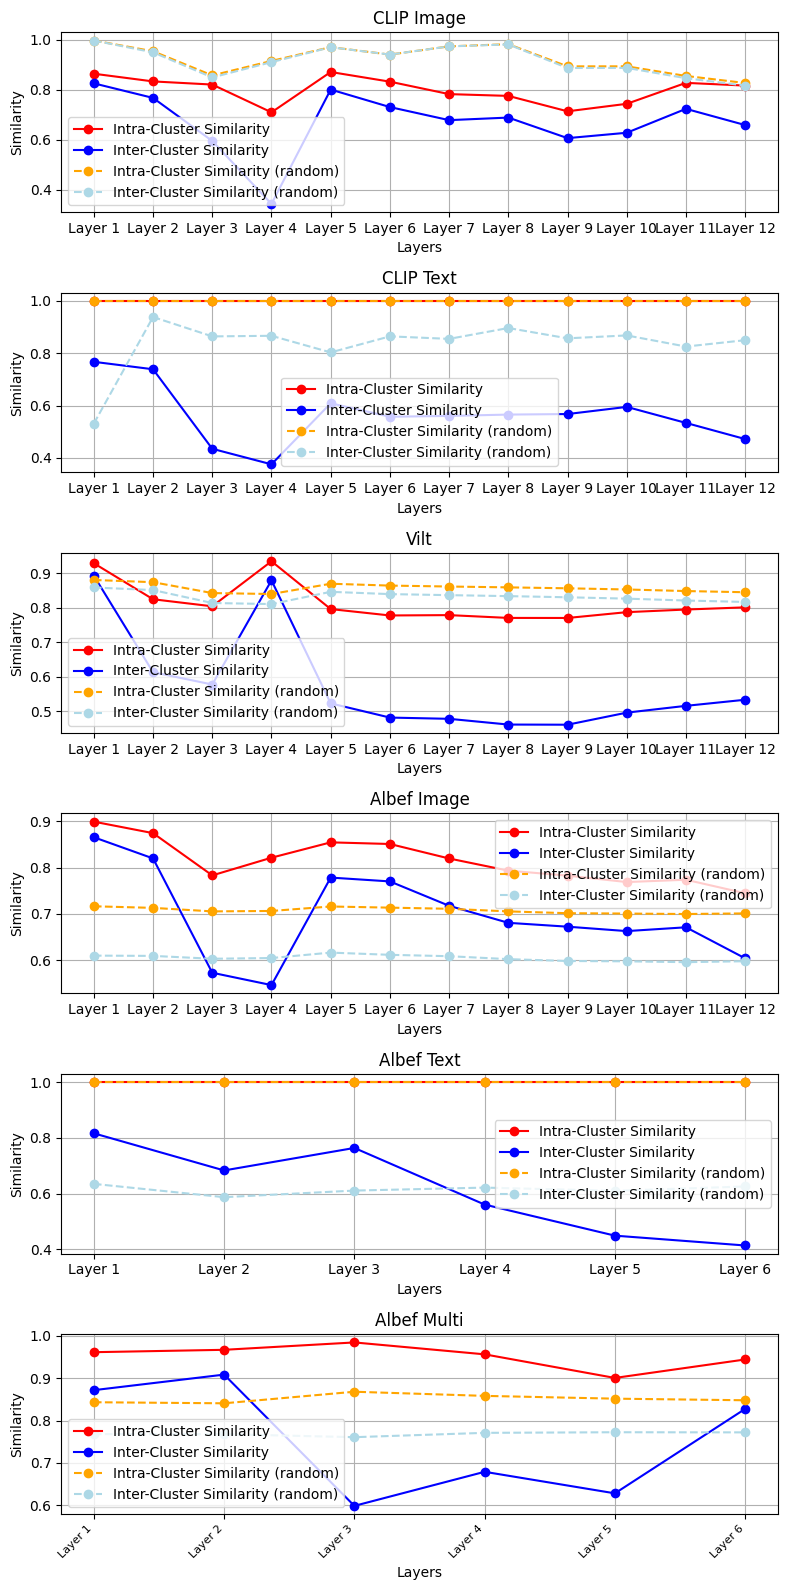

In [5]:
fig, axs = plt.subplots(6, 1, figsize=(8, 16)) 

plot_intra_inter(inter_clip_img, intra_clip_img, intra_clip_img_r, inter_clip_img_r, "CLIP Image", axs[0])
plot_intra_inter(inter_clip_txt, intra_clip_txt, intra_clip_txt_r, inter_clip_txt_r, "CLIP Text", axs[1])
plot_intra_inter(inter_vilt, intra_vilt, intra_vilt_r, inter_vilt_r, "Vilt", axs[2])
plot_intra_inter(inter_albef_img, intra_abelf_img, intra_abelf_img_r, inter_albef_img_r, "Albef Image", axs[3])
plot_intra_inter(inter_abelf_txt, intra_abelf_txt, intra_abelf_txt_r, inter_abelf_txt_r, "Albef Text", axs[4])
plot_intra_inter(inter_albef_multi, intra_abelf_multi, intra_abelf_multi_r, inter_albef_multi_r, "Albef Multi", axs[5])

plt.tight_layout()
plt.show()


In [1]:
# TODO: LIKE THIS PLOT BUT HUES IS BRAIN AREAS

In [6]:
# For completions sake also for the models with only one modality: Vit, Bert and Gpt

In [7]:
def plot_intra_inter_single_modality(inter, intra, model, ax):
    layers = [f"Layer {i+1}" for i in range(len(inter))]
    ax.plot(layers, intra, marker="o", color="red", label="Intra-Cluster Similarity")
    ax.plot(layers, inter, marker="o", color="blue", label="Inter-Cluster Similarity")
    ax.set_xlabel("Layers")
    ax.set_ylabel("Similarity")
    ax.set_title(f"{model}")
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.grid(True)
    ax.legend()

In [8]:
intra_vit, inter_vit = inter_intra_similarity(vit, "Vit")
intra_bert, inter_bert = inter_intra_similarity(bert_feats, "Bert")
intra_gpt, inter_gpt = inter_intra_similarity(gpt_feats, "Gpt")

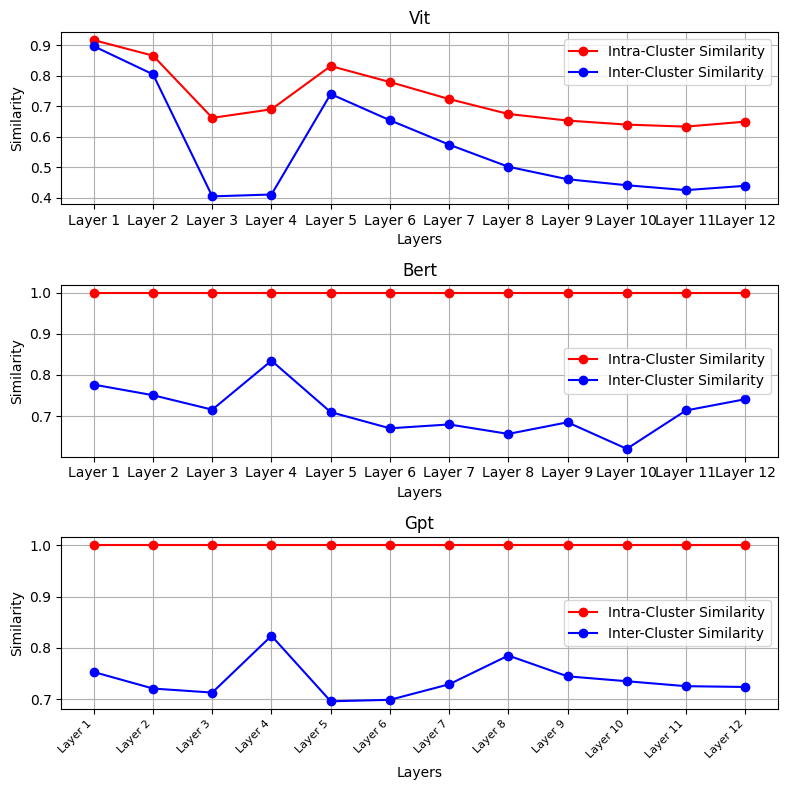

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8)) 

plot_intra_inter_single_modality(inter_vit, intra_vit, "Vit", axs[0])
plot_intra_inter_single_modality(inter_bert, intra_bert, "Bert", axs[1])
plot_intra_inter_single_modality(inter_gpt, intra_gpt, "Gpt", axs[2])
plt.tight_layout()
plt.show()